In [1]:
import pandas as pd

In [3]:
import os

In [4]:
def load_data(csv_path):
    return pd.read_csv(csv_path)

In [7]:
data = load_data('/Users/ibrahimshaarawy/Desktop/research/data/dataset_2019.csv')

In [8]:
data.head()

,id,Project,LongName,Name,LCOM5,NL,NLE,WMC,CBO,CBOI,...,LOC,TLOC,NG,TLLOC,TNA,TNG,TNM,TNOS,TNPM,ReuseRate
0,0,ch.qos.logback/logback-classic,ch.qos.logback.classic.AsyncAppender,AsyncAppender,2,1,1,5,2,0,...,29,29,0,18,1,0,4,7,2,6
1,1,ch.qos.logback/logback-classic,ch.qos.logback.classic.BasicConfigurator,BasicConfigurator,1,0,0,2,5,1,...,31,31,0,20,0,0,2,14,2,4
2,2,ch.qos.logback/logback-classic,ch.qos.logback.classic.ClassicConstants,ClassicConstants,0,0,0,0,0,7,...,35,35,0,19,17,0,0,0,0,6
3,3,ch.qos.logback/logback-classic,ch.qos.logback.classic.Level,Level,1,1,1,46,0,32,...,274,274,0,160,24,0,13,68,11,122
4,4,ch.qos.logback/logback-classic,ch.qos.logback.classic.Logger,Logger,1,3,3,154,5,23,...,754,754,7,502,10,7,96,248,80,82


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24794 entries, 0 to 24793
Data columns (total 32 columns):
id           24794 non-null int64
Project      24794 non-null object
LongName     24794 non-null object
Name         24794 non-null object
LCOM5        24794 non-null int64
NL           24794 non-null int64
NLE          24794 non-null int64
WMC          24794 non-null int64
CBO          24794 non-null int64
CBOI         24794 non-null int64
NII          24794 non-null int64
NOI          24794 non-null int64
RFC          24794 non-null int64
AD           24794 non-null float64
CD           24794 non-null float64
TCD          24794 non-null float64
CLOC         24794 non-null int64
TCLOC        24794 non-null int64
DLOC         24794 non-null int64
PDA          24794 non-null int64
DIT          24794 non-null int64
LLOC         24794 non-null int64
LOC          24794 non-null int64
TLOC         24794 non-null int64
NG           24794 non-null int64
TLLOC        24794 non-null int6

In [10]:
data.describe()

,id,LCOM5,NL,NLE,WMC,CBO,CBOI,NII,NOI,RFC,...,LOC,TLOC,NG,TLLOC,TNA,TNG,TNM,TNOS,TNPM,ReuseRate
count,24794.000000,24794.000000,24794.000000,24794.000000,24794.000000,24794.000000,24794.000000,24794.000000,24794.000000,24794.000000,...,24794.000000,24794.000000,24794.000000,24794.000000,24794.000000,24794.000000,24794.000000,24794.000000,24794.000000,24794.000000
mean,12396.500000,2.347705,1.192587,1.046019,15.659111,4.998104,3.216383,4.418246,5.759861,13.800637,...,111.178027,123.494757,4.427563,81.937203,5.915504,4.965234,25.863919,33.820440,19.757562,4.283214
std,7157.555623,5.187990,1.721310,1.335027,36.106116,7.841163,12.597022,20.675423,14.695094,24.994035,...,240.089906,273.051045,12.899818,176.181894,14.807522,14.046488,49.305967,88.554174,38.630555,41.813545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6198.250000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,3.000000,...,17.000000,17.000000,0.000000,13.250000,1.000000,0.000000,3.000000,3.000000,2.000000,0.000000
50%,12396.500000,1.000000,1.000000,1.000000,6.000000,3.000000,1.000000,1.000000,2.000000,7.000000,...,41.000000,44.000000,1.000000,31.000000,2.000000,1.000000,9.000000,10.000000,6.000000,0.000000
75%,18594.750000,2.000000,2.000000,2.000000,16.000000,6.000000,2.000000,2.000000,5.000000,15.000000,...,107.000000,118.000000,4.000000,79.000000,6.000000,4.000000,25.000000,29.000000,18.000000,1.000000
max,24793.000000,169.000000,24.000000,10.000000,1057.000000,235.000000,551.000000,1368.000000,504.000000,799.000000,...,9300.000000,9300.000000,198.000000,7303.000000,714.000000,224.000000,1742.000000,4063.000000,1456.000000,3964.000000


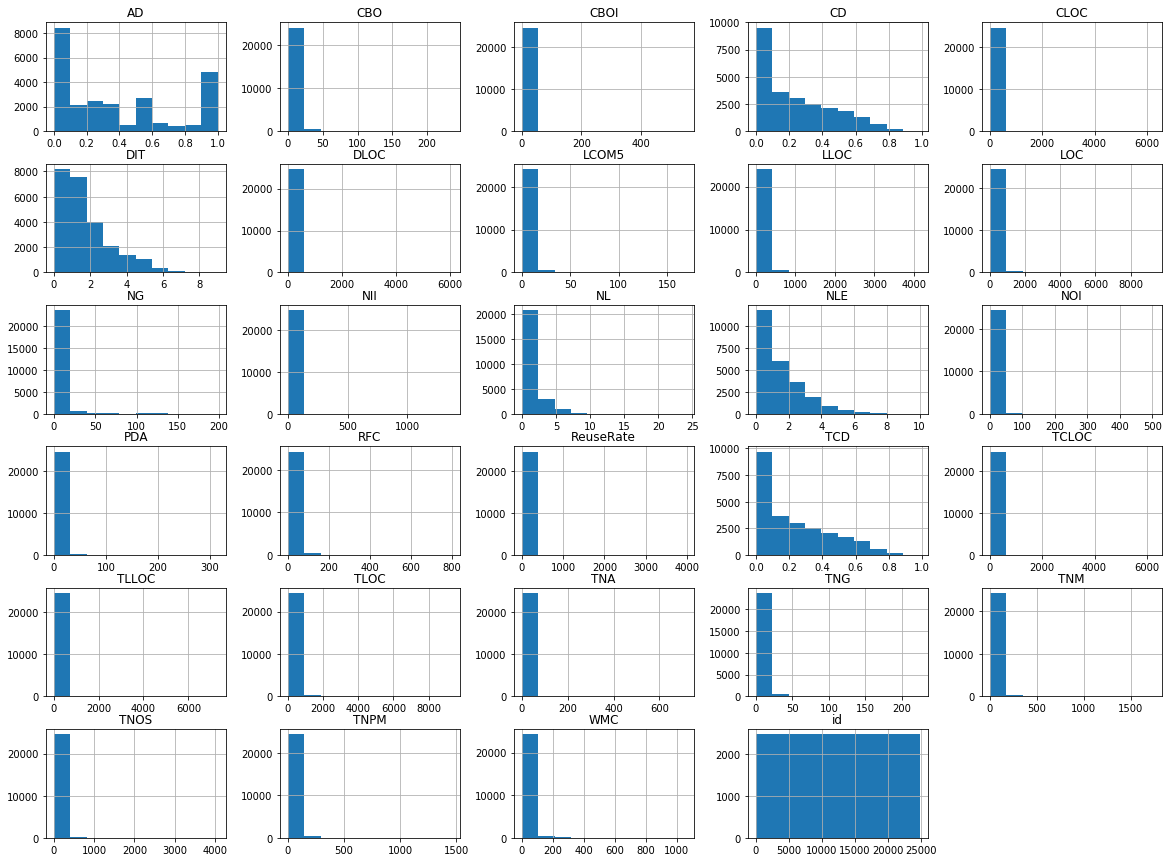

In [16]:
%matplotlib inline   
import matplotlib.pyplot as plt
data.hist(bins=10, figsize=(20,15))
plt.show()

In [17]:
corr_matrix = data.corr()

In [18]:
corr_matrix["ReuseRate"].sort_values(ascending=False)

ReuseRate    1.000000
CBOI         0.219900
PDA          0.192324
DLOC         0.177264
TCLOC        0.169921
CLOC         0.169438
NII          0.154022
TLOC         0.128110
LOC          0.127535
CD           0.117808
TCD          0.114076
AD           0.110078
RFC          0.105331
WMC          0.096816
TLLOC        0.084689
LLOC         0.078485
TNM          0.076548
TNOS         0.075235
TNPM         0.072914
LCOM5        0.059620
NLE          0.056822
CBO          0.054139
NOI          0.052187
NL           0.047422
TNA          0.039704
TNG          0.036277
NG           0.033191
id          -0.022487
DIT         -0.027721
Name: ReuseRate, dtype: float64